In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, classification_report, recall_score


# Leitura das informações

In [2]:
#Realizar leitura da base de dados
data_copa = pd.read_csv('dataset_copa_do_mundo.csv')


In [3]:
data_copa.shape

(140, 12)

In [4]:
data_copa.head()

,Id,Name,Nationality,Idade,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,1,A. Witsel,Belgium,33,186,84,63,77,70,61,72,Defensor
1,2,L. Dendoncker,Belgium,27,188,77,62,80,72,70,69,Defensor
2,3,T. Alderweireld,Belgium,33,187,72,50,75,80,63,61,Defensor
3,4,J. Vertonghen,Belgium,35,189,73,51,77,79,63,66,Defensor
4,5,J. Gvardiol,Croatia,20,185,74,56,80,67,77,67,Defensor


In [5]:
#Verificando info sobre o dataset
data_copa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            140 non-null    int64 
 1   Name          140 non-null    object
 2    Nationality  140 non-null    object
 3   Idade         140 non-null    int64 
 4   Altura        140 non-null    int64 
 5   Passe         140 non-null    int64 
 6   Finalização   140 non-null    int64 
 7   Físico        140 non-null    int64 
 8   Desarme       140 non-null    int64 
 9   Velocidade    140 non-null    int64 
 10  Drible        140 non-null    int64 
 11  Classe        140 non-null    object
dtypes: int64(9), object(3)
memory usage: 13.2+ KB


# Pré-processamento

* Como a quantidade de cada classe está muito próxima uma da outra, não foi necessário realizar nenhuma operação de balanceamento

In [6]:
#Contar a quantidade de aparições de cada classe
data_copa['Classe'].value_counts()

Defensor    71
Atacante    69
Name: Classe, dtype: int64

* Vamos eliminar características desnecessárias

In [7]:
data_copa.drop(['Id', 'Name','Idade'], axis=1, inplace=True)


In [8]:
data_copa.drop(data_copa.columns[[0]], axis=1, inplace=True)
data_copa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Altura       140 non-null    int64 
 1   Passe        140 non-null    int64 
 2   Finalização  140 non-null    int64 
 3   Físico       140 non-null    int64 
 4   Desarme      140 non-null    int64 
 5   Velocidade   140 non-null    int64 
 6   Drible       140 non-null    int64 
 7   Classe       140 non-null    object
dtypes: int64(7), object(1)
memory usage: 8.9+ KB


In [9]:
data_copa.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,186,84,63,77,70,61,72,Defensor
1,188,77,62,80,72,70,69,Defensor
2,187,72,50,75,80,63,61,Defensor
3,189,73,51,77,79,63,66,Defensor
4,185,74,56,80,67,77,67,Defensor


* Plotando o gráfico

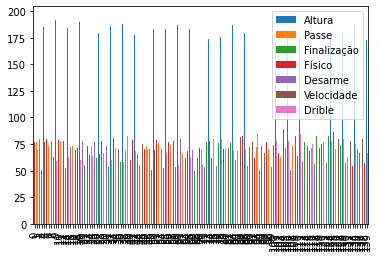

In [10]:
data_copa.plot(kind='bar')

* Normalizando os dados através da operação MIN MAX

In [11]:
df_copia = data_copa.copy()
for coluna in df_copia.columns:
  if (coluna != "Classe"):
    df_copia[coluna] = (df_copia[coluna] - df_copia[coluna].min()) / (df_copia[coluna].max() - df_copia[coluna].min())

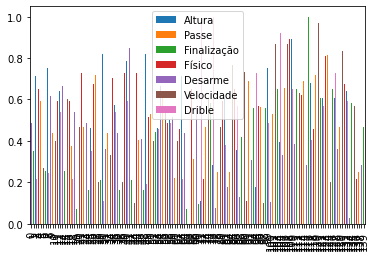

In [12]:
df_copia.plot(kind="bar")

In [13]:
df_copia.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,0.678571,0.90625,0.372093,0.648649,0.487179,0.066667,0.513514,Defensor
1,0.750000,0.68750,0.348837,0.729730,0.538462,0.366667,0.432432,Defensor
2,0.714286,0.53125,0.069767,0.594595,0.743590,0.133333,0.216216,Defensor
3,0.785714,0.56250,0.093023,0.648649,0.717949,0.133333,0.351351,Defensor
4,0.642857,0.59375,0.209302,0.729730,0.410256,0.600000,0.378378,Defensor


* Por fim, vamos modificar os valores categóricos (defensor, atacante) para valores inteiros.

In [14]:
label_encoder = LabelEncoder()

df_copia['Classe'] = label_encoder.fit_transform(df_copia['Classe'])

In [15]:
df_copia['Classe'].value_counts()

1    71
0    69
Name: Classe, dtype: int64

In [16]:
df_copia.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,0.678571,0.90625,0.372093,0.648649,0.487179,0.066667,0.513514,1
1,0.750000,0.68750,0.348837,0.729730,0.538462,0.366667,0.432432,1
2,0.714286,0.53125,0.069767,0.594595,0.743590,0.133333,0.216216,1
3,0.785714,0.56250,0.093023,0.648649,0.717949,0.133333,0.351351,1
4,0.642857,0.59375,0.209302,0.729730,0.410256,0.600000,0.378378,1


# Procedimento de treino

* Abordagem utilizando Train-test-split

In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_copia, df_copia.Classe, test_size=0.30, random_state=42)
print("X treino: ", X_treino.shape)
print("X teste: ", X_teste.shape)
print("y treino: ", y_treino.shape)
print("y teste: ", y_teste.shape)

X treino:  (98, 8)
X teste:  (42, 8)
y treino:  (98,)
y teste:  (42,)


In [18]:
X_treino.drop(['Classe'], axis=1, inplace=True)

In [19]:
X_treino.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible
40,0.785714,0.93750,0.302326,0.594595,0.794872,0.033333,0.594595
24,0.750000,0.53125,0.162791,0.864865,0.743590,0.366667,0.297297
93,0.214286,0.53125,0.558140,0.108108,0.025641,0.533333,0.837838
126,0.785714,0.46875,0.651163,0.621622,0.205128,0.666667,0.540541
112,0.750000,0.75000,0.651163,0.324324,0.205128,0.633333,0.756757


In [20]:
X_teste.drop(['Classe'], axis=1, inplace=True)

* Antes de utilizarmos o K-means é necessário descobrir a quantidade ideal de clusters. Para isso vamos utilizar o método do cotovelo (elbow).

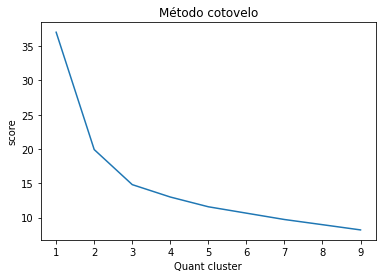

In [21]:
score = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X_treino, y_treino)
  score.append(kmeans.inertia_)

plt.plot(range(1,10), score)
plt.title("Método cotovelo")
plt.xlabel("Quant cluster")
plt.ylabel("score")
plt.show()


* Logo, a quantidade ideal de clusters == 2

In [60]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_treino,y_treino)
predicoes = kmeans.predict(X_teste)
print("ACC:", accuracy_score(y_teste, predicoes))


ACC: 0.9523809523809523


# Métricas

* Plotando a matriz de confusão

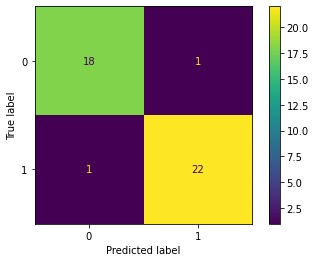

In [61]:
cm = confusion_matrix(y_teste, predicoes, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()

In [62]:
tn, fp, fn, tp = confusion_matrix(y_teste, predicoes).ravel()
specificity = tn / (tn+fp)
print("ACC:", accuracy_score(y_teste, predicoes))
print("Taxa de erro: ", (1- accuracy_score(y_teste, predicoes)))
print("Especificidade: ", specificity)
target_names = ['Defensor', 'Atacante']
print(classification_report(y_teste, predicoes,labels=None, target_names = target_names, zero_division= 1))




ACC: 0.9523809523809523
Taxa de erro:  0.04761904761904767
Especificidade:  0.9473684210526315
              precision    recall  f1-score   support

    Defensor       0.95      0.95      0.95        19
    Atacante       0.96      0.96      0.96        23

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



In [63]:
pd.concat([y_teste.reset_index(drop=True), pd.DataFrame(predicoes)], axis=1)

,Classe,0
0,0,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


# Verificação no dataset de Validação

In [64]:
validacao = pd.read_csv('dataset_validacao_sem_classes.csv')
validacao.head()

,Id,Nome,Nacionalidade,Idade,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,1,Laguardia,Spain,33,185,63,55,75,72,65,57,?
1,2,Maraš,Serbia,27,186,62,47,75,70,65,51,?
2,3,Hara,Japan,23,191,58,69,77,54,70,64,?
3,4,García,Spain,31,166,66,72,53,59,71,68,?
4,5,Olivas,Spain,34,184,63,55,75,70,67,54,?


In [65]:
validacao.drop(['Id', 'Nome', 'Nacionalidade', 'Idade'], axis=1, inplace=True)

In [67]:
validacao.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,185,63,55,75,72,65,57,?
1,186,62,47,75,70,65,51,?
2,191,58,69,77,54,70,64,?
3,166,66,72,53,59,71,68,?
4,184,63,55,75,70,67,54,?


In [68]:
validacao.drop(['Classe'], axis=1, inplace=True)

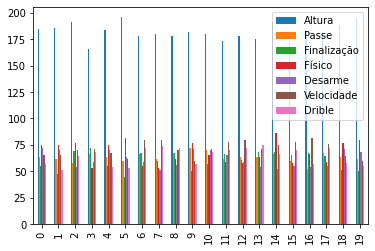

In [69]:
validacao.plot(kind='bar')

In [70]:
validacao_copia = validacao.copy()
for coluna in validacao_copia.columns:
  if (coluna != "Classe"):
    validacao_copia[coluna] = (validacao_copia[coluna] - validacao_copia[coluna].min()) / (validacao_copia[coluna].max() - validacao_copia[coluna].min())

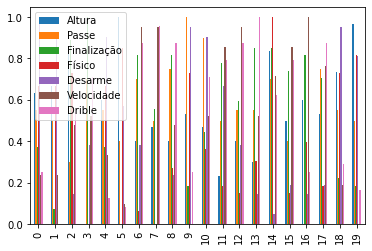

In [71]:
validacao_copia.plot(kind='bar')

In [72]:
validacao_copia.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible
0,0.633333,0.55,0.370370,0.666667,1.000000,0.238095,0.250000
1,0.666667,0.50,0.074074,0.666667,0.904762,0.238095,0.000000
2,0.833333,0.30,0.888889,0.727273,0.142857,0.476190,0.541667
3,0.000000,0.70,1.000000,0.000000,0.380952,0.523810,0.708333
4,0.600000,0.55,0.370370,0.666667,0.904762,0.333333,0.125000


In [73]:
pred = kmeans.predict(validacao_copia)

In [74]:
resultado = pd.concat([validacao.reset_index(drop=True), pd.DataFrame(pred)], axis=1)

In [75]:
resultado.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,0
0,185,63,55,75,72,65,57,1
1,186,62,47,75,70,65,51,1
2,191,58,69,77,54,70,64,0
3,166,66,72,53,59,71,68,0
4,184,63,55,75,70,67,54,1


In [76]:
resultado.rename(columns={0: 'Classe'}, inplace=True)
resultado.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,185,63,55,75,72,65,57,1
1,186,62,47,75,70,65,51,1
2,191,58,69,77,54,70,64,0
3,166,66,72,53,59,71,68,0
4,184,63,55,75,70,67,54,1


In [77]:
resultado['Classe'] = resultado['Classe'].map({0: 'Atacante', 1:'Defensor'})
resultado.head()

,Altura,Passe,Finalização,Físico,Desarme,Velocidade,Drible,Classe
0,185,63,55,75,72,65,57,Defensor
1,186,62,47,75,70,65,51,Defensor
2,191,58,69,77,54,70,64,Atacante
3,166,66,72,53,59,71,68,Atacante
4,184,63,55,75,70,67,54,Defensor


In [78]:
resultado.to_csv('Resultado_validacao.csv', index=False)